# 모델 성능 평가

머신러닝 프로세스
- 데이터 가공/변환
- 모델 학습/예측
- 평가(Evaluation)

분류 유형

이진 분류
- 결정 클래스 값 종류의 유형에 따라 긍정/부정과 같은 2개의 결과값만을 가지는 분류

멀티 분류
- 여러 개의 결정 클래스 값을 가지는 분류

### 분류 모델의 평가 지표
: 예측 대상이 범주형 데이터 경우
- 정확도(Accuracy)
- 재현율(Recall)
- 정밀도(Precision)
- F1 measure
- G measure
- ROC curve
- AUC

### 회귀 모델의 평가 지표
: 예측 대상이 수치 데이터인 경우
- MSE(Mean Square Error)
- RMSE(Root Mean Square Error)
- MAE(Mean Absolute Error)
- MAPE(Mean Absolute Percentage Error)
- $ R^2 $

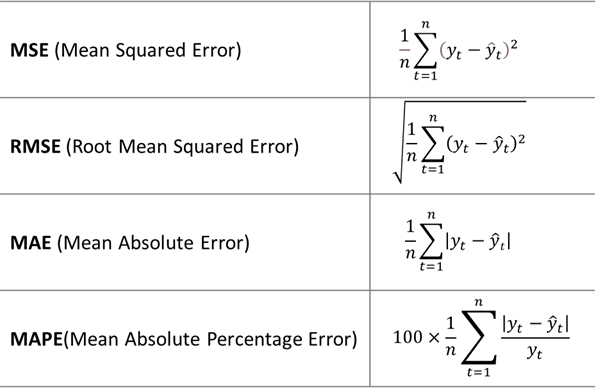


# 분류 모델의 성능 평가 지표

## Accuracy(정확도)

- 실제 데이터와 예측 데이터가 얼마나 같은지를 판단하는 지표

- $ 정확도(Accuracy) =  \frac{예측 결과가 동일한 데이터 건수}{전체 예측 데이터 건수} $


- 직관적으로 모델 예측 성능을 나타내는 평가 지표
- 그러나 이진 분류의 경우 데이터의 구성에 따라 ML 모델의 성능을 왜곡할 수 있기 때문에 
    - 정확도 수치 하나만 가지고 성능을 평가하지는 않음


- 특히 정확도는 불균형한 레이블 값 분포에서 ML 모델의 성능을 판단할 경우, 적합한 지표가 아님

### 정확도 지표가 ML 모델의 성능을 왜곡하는 예
* 타이타닉 예제 수행 결과 정확도의 결과가 80%대였지만
*  탑승객이 남자인 경우보다 여자인 경우에 생존 확률이 높았기 대문에
* 별다른 알고리즘 적용 없이 무조건 
* 성별이 여자인 경우 생존, 남자인 경우 사망으로 예측해도 
*  이와 비슷한 수치가 나올 수 있음
* 알고리즘 성능이 좋지 않더라도 단지 성별 조건 하나만을 가지고도 높은 정확도를 나타내는 상황이 발생하는 것

### 정확도 문제 예
1. 타이타닉 생존자 예측
2. MNIST 데이터 세트

### 1. 타이타닉 생존자 예측

In [1]:
# 더미 모델을 생성(아무런 학습을 하지 않고 성별에 따라 생존자를 예측하는 모델)
import numpy as np
from sklearn.base import BaseEstimator
# BaseEstimator는 fit, predict 함수를 사용할 수 있게 기본기능을 제공하는 클래스
# BaseEstimator 상속받아서 사용자 정의 모델을 생성할 수도 있음

class MyDummyClassifier(BaseEstimator) :
    # fit() 메서드는 아무것도 하지 않는 메서드로 재정의
    def fit(self, X, y=None) :
        pass # 아무것도 하지 않음
    
    # predict()메서드는 단순히 성별이 1이면 0을 리턴, 그렇지 않으면 1로 리턴
    def predict(self, X) :
        pred = np.zeros((X.shape[0],1))
        for i in range(X.shape[0]) :
            if X['Sex'].iloc[i] == 1 : # 남성이면
                pred[i]=0 #사망
            else :
                pred[i]=1 #생존
        return pred

**MyDummyClassifier를 이용해 타이타닉 생존자 예측 수행**

In [2]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1] # 첫문자만 추출
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('./data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df) # 데이터 전처리
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df,
                                                  y_titanic_df,
                                                  test_size=0.2,
                                                  random_state=0)

In [4]:
# 위에서 생성한 더미모델을 이용해서 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train) # 아무 작업도 하지 않음
mypred = myclf.predict(X_test)
print('더미클래스의 정확도는 ', accuracy_score(y_test, mypred))

더미클래스의 정확도는  0.7877094972067039


- 상당히 높은 정확도가 나왔지만, 데이터 자체가 불균형한 데이터힘
    - 도메인적인 내용으로 봤을때 남성의 사망율이 월등히 높다.
    - 남성을 무조건 사망으로 했을대 어느정도의 정확도는 보장하게 된다
- 학습된 결과에 의한 성능이 아님

### 2. MNIST 데이터 세트
* 0~9까지의 숫자 이미지의 픽셀 정보를 가지고 있고
* 이를 기반으로 숫자 Digit을 예측하는 데 사용
* 사이킷런의 load_digits() API를 통해 MNIST 데이터 세트 제공

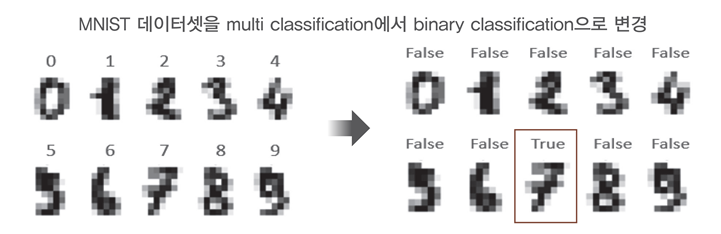

**이진 분류 문제로 변환**
* 불균형한 데이터 세트로 변형
* 레이블 값이 7인 것만 True, 나머지 값은 모두 False로 변환
* True : 전체 데이터의 10%
* False : 90%
    
**입력되는 모든 데이터를 False, 즉 0으로 예측하는 classifier를 이용해**
* 정확도를 측정하면 약 90%에 가까운 예측 정확도를 나타냄

### 정확도 평가 지표의 맹점
* 아무것도 하지 않고 무조건 특정한 결과로 찍어도
* 데이터가 균일하지 않은 경우 높은 수치가 나타날 수 있음

In [5]:
from sklearn.datasets import load_digits
import pandas as pd

class MyFaseClassifier(BaseEstimator) :
    def fit(self, X, y) :
        pass
    
    def predict(self, X) : # 무조건 0으로 예측(전부 7이 아닌걸로 예측)
        return np.zeros((len(X),1),dtype=bool)

In [6]:
# 데이터 준비
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [7]:
digits.data.shape
digits.target.shape

(1797,)

In [9]:
digits.data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

In [8]:
(digits.target == 7).astype(int)

array([0, 0, 0, ..., 0, 0, 0])

In [10]:
# 타겟값 변경
# digit 번호가 7이면 True 아니면 False로 변경하고 값은 1,0 로 변환
y = (digits.target==7).astype(int)
y

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
X_train, X_test, y_train, y_test=train_test_split(digits.data, y, random_state=11)

In [12]:
# 데이터 분포 확인
print('레이블 테스트 세트 크기 : ', y_test.shape)
print('테스트 데이터 0과 1의 분포 : \n',pd.Series(y_test).value_counts())

레이블 테스트 세트 크기 :  (450,)
테스트 데이터 0과 1의 분포 : 
 0    405
1     45
dtype: int64


In [13]:
# fake 모델로 학습/예측/평가
fake_cl = MyFaseClassifier()
fake_cl.fit(X_train, y_train)
fakepred = fake_cl.predict(X_test) # 전부 0으로 예측함
accuracy = accuracy_score(y_test, fakepred)
accuracy

0.9

- 이진분류  문제에서 데이터가 불균형하면 어떤 특정 작업 없이도 정확도는 높게 나타난다
    - 이런 이유로 분류에서는 정확도 외에 다른 평가지표를 사용해야 함

# Confusion Matrix (오차 행렬)

오차행렬 (Confusion Matrix : 혼동행렬)
* 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표
* 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고(confused) 있는지도 함께 보여주는 지표
* 4분면 행렬에서 실제 레이블 클래스 값과 예측 레이블 클래스 값이 어떤 유형을 가지고 맵핑되는지 나타냄
* 예측 클래스와 실제 클래스의 값 유형에 따라 TN, FP, FN, TP 형태
* TN, FP, FN, TP 값을 다양하게 결합해 분류 모델 예측 성능의 오류가 어떤 모습으로 발생하는지 알 수 있음

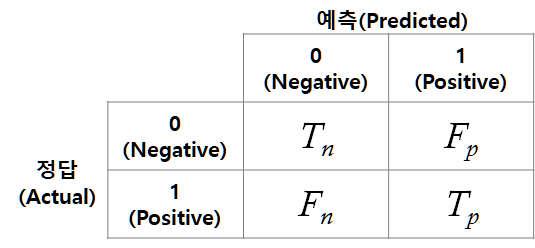

TN, FP, FN, TP는 예측 클래스와 실제 클래스의 
* Positive 결정값(1)과 Negative 결정값(0)의 결합에 따라 결정
* 앞 문자 T/F(True/False) : 예측값과 실제값이 '같은가/틀린가' 의미
* 뒤 문자 N/P(Negative/Positive) : 예측 결과 값이 부정(0)/긍정(1) 의미
* 예 : TN (True Negative) 
    - 앞 True : 예측 클래스 값과 실제 클래스 값이 같다는 의미
    - 뒤 Negative : 예측 값이 Negative 값이라는 의미


#### 분류의 성능을 평가하는 행렬
- 실제로 참(True)인지 거짓(False)인지, 
- 예측을 긍정(Positive)으로  했는지, 부정(Negative)으로 했는지에 따라 네 개의 경우의 수로 구분한 표
- 머신러닝에서 오차행렬은 중요한데, 
- 왜냐하면 머신러닝 모델의 예측이 얼마나 잘한 예측인지를 판단하는 데 중요한 기준을 제공
- 오차행렬로부터 우리는 머신러닝 모델의 우수성을 평가하는 여러 지표를  도출할 수 있음

In [14]:
from sklearn.metrics import confusion_matrix

# 위에서 정확도가 90%가 나왔던 fakepred 예측에 대하여 onfusion_matrix 구성
confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

결과  
[[TN, FP],  
 [FN, TP]]

MyFakeClassifier는 load_digits()에서 target=7인지 아닌지에 따라  
클래스 값을 True/False 이진 분류로 변경한 데이터 세트를 사용해서  
무조건 Negative로 예측하는 Classifier였고  
테스트 데이터 세트의 클래스 값 분포는 0이 450건, 1이 45건 이었음  

* TN : 전체 450건 데이터 중 무조건 Negative 0으로 예측해서 True가 된 결과 405건
    - 실제값/예측값 동일, Negative로 예측  
* FP : Positive 1로 예측한 건수가 없으므로 0건
    - 실제값/예측값 다름, Positive로 예측  
* FN : Positive 1인 건수 45건을  Negative 0으로 예측해서 False가 된 결과 45건
    - 실제값/예측값 다름, Negative로 예측  
* TP : Positive 1로 예측한 건수가 없으므로 0건
    - 실제값/예측값 동일, Positive로 예측  

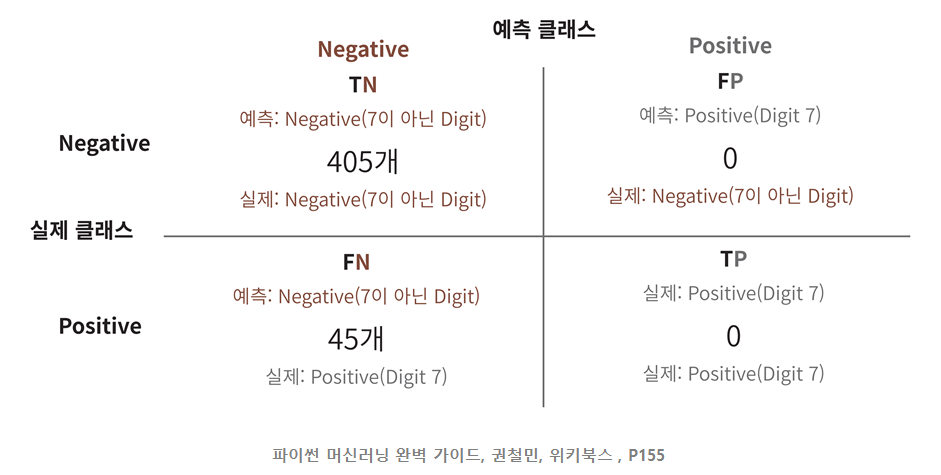

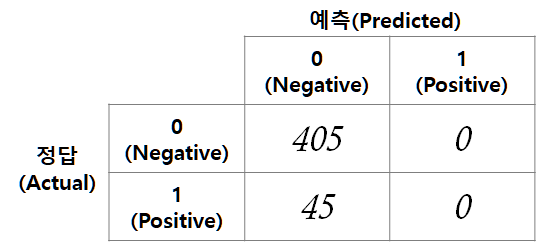

**TN, FP, FN, TP 값은 Classifier 성능의 여러 면모를 판단할 수 있는 기반 정보 제공**
- 이 값을 조합해 Classifier의 성능을 측정할 수 있는 주요 지표인 정확도(Accuracy), 정밀도(Predision), 재현율(Recall) 값을 알 수 있음

### 오차행렬 상에서 정확도

* 정확도(Accuracy) = 예측 결과와 실제 값이 동일한 건수 / 전체 데이터 수

    $ = \frac{TN + TP}{ TN + FP + FN + TP }$

### 불균형한 이진 분류 모델 

* 많은 데이터 중에서 중점적으로 찾아야 하는 매우 적은 수의 결과 값에 Positive를 설정해 1 값을 부여하고
* 그렇지 않은 경우는 Negative로 0을 부여하는 경우가 많음  

예1: 사기 행위 예측 모델
* 사기 행위 : Positive 양성으로 1
* 정상 행위 : Negative 음성으로 0  
    
예2 : 암 검진 예측 모델
* 양성 : Positive 양성으로 1
* 음성 : Negative 음성으로 0 

### 불균형한 이진 분류 데이터 세트에서 정확도의 맹점

**Positive 데이터 건수가 매우 작아서 Positive 보다는 Negative로 예측 정확도가 높아지는 경향이 발생**  

- 10,000 건의 데이터 세트에서 9,900 건이 Negative이고 100건이 Positive라면 Negative로 예측하는 경향이 더 강해져서 TN은 매우 커지고 TP는 매우 작아지게 됨  

- 또한 Negative로 예측할 때 정확도가 높기 때문에 FN(Negative로 예측할 때 틀린 데이터 수)이 매우 작고, Positive로 예측하는 경우가 작기 때문에 FP 역시 매우 작아짐  

- 정확도 지표는 비대칭한 데이터 세트에서 Positive에 대한 예측 정확도를 판단하지 못한 채 Negative에 대한 예측 정확도만으로도 분류의 정확도가 매우 높게 나타나는 수치적인 판단 오류를 일으키게 됨  


**불균형한 데이터 세트에서 정확도보다 더 선호되는 평가 지표**
- 정밀도(Predision)와 재현율(Recall) 

# 정밀도(Precision)와 재현율(Recall)

### 정밀도(Predision)와 재현율(Recall)
* Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표
* 앞의 MyFakeClassifier는 Positive로 예측한 TP값이 하나도 없기 때문에
* 정밀도와 재현율 값이 모두 0

**정밀도와 재현율 계산 공식**
* 정밀도 = TP / (FP + TP)
* 재현율 = TP / (FN + TP)

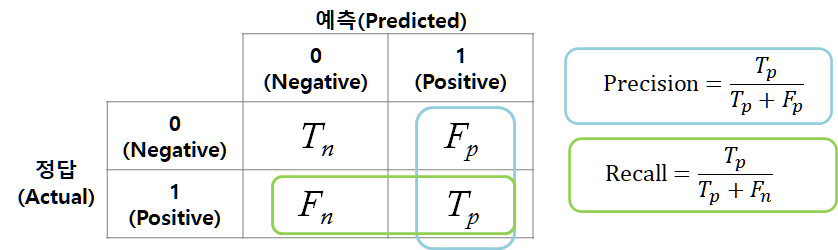

### 정밀도 : TP / (FP + TP)
#### Positive로 예측한 데이터 중 정답의 비율
* 예측을 Positive로 한 대상 중에 
* 예측과 실제 값이 Positive로 일치한 데이터의 비율
* 예측한 양성 대 예측한(맞춘) 양성
* 공식의 분모인 (FP + TP)는 예측을 Positive로 한 모든 데이터 건수 (예측한 양성)
* 분자인 TP는 예측과 실제 값이 Positive로 일치한 데이터 건수 (맞춘 양성)
* Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표로 
* 양성 예측도라고도 불림

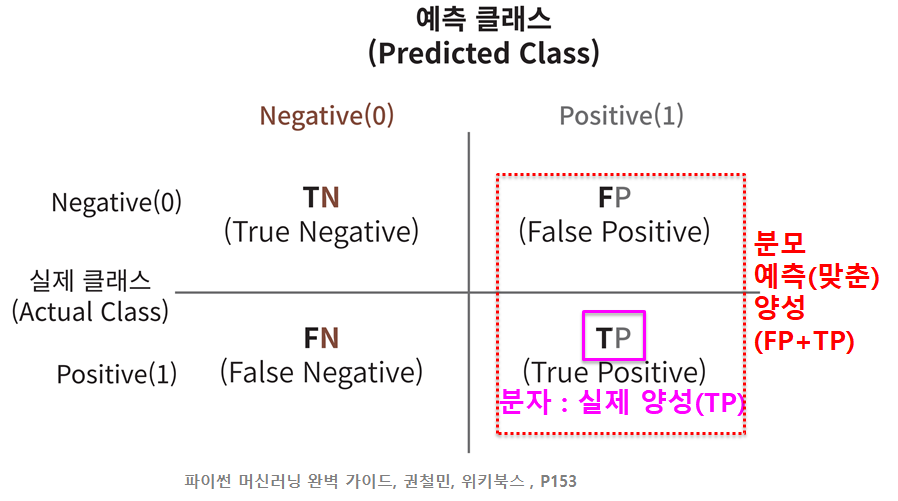

### 재현율 : TP / (FN + TP)
#### 정답이 positive인 대상중에 positive로 정답을 맞춘 비율
* 실제값이 Positive인 대상 중에
* 예측과 실제 값이 Positive로 일치한 데이터의 비율
* 실제 양성 대 예측한(맞춘) 양성 비율
* 공식의 분모인 (FN + TP)는 실제값이 Positive인 모든 데이터 건수 (실제 양성)
* 분자인 TP는 예측과 실제 값이 Positive로 일치한 데이터 건수 (맞춘 양성)
* 민감도(Sensitivity) 또는 TPR(True Positive Rate)이라고도 불림

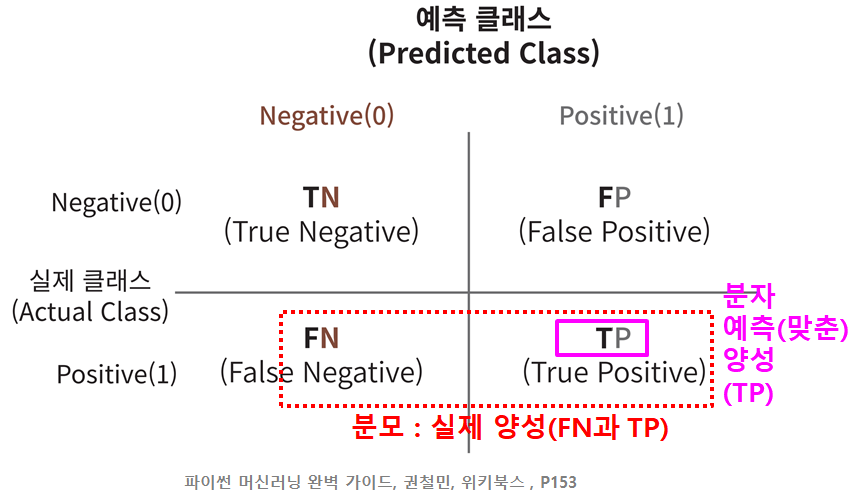

보통은 재현율이 정밀도보다 상대적으로 중요한 업무가 많지만  
정밀도가 더 중요한 지표인 경우도 있음

예: 스팸메일 여부를 판단하는 모델
* 실제 Positive인 스팸메일을 Negative인 일반 메일로 분류하더라도
* 사용자가 불편함을 느끼는 정도이지만
* 실제 Negative인 일반 메일을 Positive인 스팸 메일로 분류할 경우
* 메일을 아예 받지 못하게 되어 업무에 차질이 생길 수 있음

**재현율이 상대적으로 더 중요한 지표인 경우**
* 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 
* 업무상 큰 영향이 발생하는 경우

예1: 암 판단 모델
* 실제 Positive인 암 환자를 
* Positive 양성이 아닌 Negative 음성으로 
* 잘못 판단했을 경우 오류의 대가가 생명을 앗아갈 정도로 심각
* 반면 실제 Negative인 환자를 암 환자인 Positive로 예측하더라도
* 재검사를 하는 수준의 비용만 소모

예2: 보험 사기와 같은 금융 사기 적발 모델
* 실제 금융거래 사기인 Positive 건을 Negative로 잘못 판단하게 되면
* 회사에 미치는 손해가 클 것임
* 반면에 정상 금융거래인 Negative를 금융사기인 Positive로 잘못 판단하더라도
* 재확인 절차를 가동하면 됨

**정밀도가 상대적으로 더 중요한 지표인 경우**
* 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면
* 업무상 큰 영향이 발생하는 경우

예: 스팸메일 여부를 판단하는 모델

정밀도와 재현율 계산 공식
* 정밀도 = TP / (FP + TP)
* 재현율 = TP / (FN + TP)


### 재현율과 정밀도의 보완적 관계
* 재현율과 정밀도 모두 TP를 높이는 데 동일하게 초점을 맞춤


* 재현율은 FN(실제 Positive, 예측 Negative)를 낮추는데 초점을 맞추고
* 정밀도는 FP를 낮추는데 초점을 맞춤


* 재현율과 정밀도는 서로 보완적인 지표로 분류의 성능을 평가하는데 적용
* **가장 좋은 성능 평가는 재현율과 정밀도 모두 높은 수치를 얻는 것**
* 반면에 둘 중 어느 **한 평가 지표만 매우 높고, 다른 수치는 매우 낮은 결과를 나타내는 경우는 바람직하지 않음**

### MyFakeClassifier의 예측 결과로 정밀도와 재현율 측정

* 사이킷런 API 사용
    - 정밀도 계산 : precision_score() 
    - 재현율 계산 : recall_score()
    - 오차행렬 : confusion_matrix()

평가 간편 적용하기 위한 함수 작성
* confusion_matrix / precision / recall 등의 평가를 한꺼번에 호출 

In [15]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

###  MNIST에서 정밀도, 재현율 확인

In [16]:
# fake 모델로 예측한 결과에 대한 정밀도와 재현율 계산
print("정밀도 : ", precision_score(y_test, fakepred))
print("재현율 : ", recall_score(y_test, fakepred))

정밀도 :  0.0
재현율 :  0.0


C:\Users\82102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- 정밀도와 재현율이 0이라는건 positive 예측을 아예 하지 않았다는 의미
    - 사용할 수 없는 모델임
    - 정확도는 높지만 다른 평가지표는 0점임

## 타이타닉 예제로 오차 행렬 및 정밀도, 재현율 구해서 예측 성능 평가
- 타이타닉 데이터를 로지스틱 회귀로 분류 수행

### 오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 함수

In [2]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test,pred) :
    confusion = confusion_matrix(y_test,pred) #오차행렬
    accuracy = accuracy_score(y_test,pred) #정확도
    precision = precision_score(y_test,pred) #정밀도
    recall = recall_score(y_test,pred) #재현율
    
    print("오차행렬")
    print(confusion)
    print("정확도/정밀도/재현율", accuracy,'/',precision,'/',recall)

** 타이타닉 예제에 오차행렬, 정밀도, 재현율 모두 구해서 예측 성능 평가 **

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('./data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df) # 데이터 전처리사용자정의함수
# 위에 생성되어 있음
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df,
                                                  y_titanic_df,
                                                  test_size=0.2,
                                                  random_state=0)

In [6]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test,pred) # 사용자 정의함수(위에 생성되어 있음)

오차행렬
[[92 18]
 [16 53]]
정확도/정밀도/재현율 0.8100558659217877 / 0.7464788732394366 / 0.7681159420289855


C:\Users\a\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- 정밀도에 비해 재현율이 약간 높게 나옴
    - 데이터에 비해 낮은 수치로 보여짐
    - 재현율과 정밀도를 강화할 수 있는 방법?

- 재현율과 정밀도는 양성예측을 기준으로 하기때문에
    - 예측자체가 확률인걸 감안하면 1이될 확율을 높이면 재현율이나 정밀도는 높아지게 됨

## Precision/Recall Trade-off

**정밀도 / 재현율 트레이드 오프(Trade-off)**
* 업무에 따라 정밀도/재현율중요도 다름
* 분류하려는 업무 특성상 정밀도 또는 재현율이 특별히 강조돼야 할 경우
* 분류의 결정 임계값(Threshold)을 조정해서
* 정밀도 또는 재현율의 수치를 높일 수 있음
* 그러나 정밀도와 재현율은 상호 보완적인 평가 지표이기 때문에
* 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지는데
* 이를 정밀도/재현율의 트레이드 오프라고 함


* 사이킷런에서는 분류 결정 임계값을 조절해서 
* 정밀도와 재현율의 성능 수치를 상호 보완적으로 조정 가능


**분류 결정 임계값
- Positive 예측값을 결정하는 확률의 기준
- 임계값을 낮출수록 True 값이 많아짐

### predict_proba( ) 메소드
- 분류결정값의 확률을 반환

타이타닉 생존자 데이터를 학습한 LogisticRegression 객체에서  
predict_proba() 메서드를 수행한 뒤 반환 값 확인하고  
predict() 메서드와 결과 비교  
앞 예제에 이어서 코드 작성

In [7]:
pred_proba = lr_clf.predict_proba(X_test)
pred_proba[:10]

array([[0.85137212, 0.14862788],
       [0.89227375, 0.10772625],
       [0.93346213, 0.06653787],
       [0.05350712, 0.94649288],
       [0.3138571 , 0.6861429 ],
       [0.48975972, 0.51024028],
       [0.08210259, 0.91789741],
       [0.06470264, 0.93529736],
       [0.41244749, 0.58755251],
       [0.29160612, 0.70839388]])

- pred_proba() 결과 : 예측 확률 배열(array)
    - 첫번째 컬럼은 0 Neg의 확률
    - 두번째 컬럼은 1 Pos의 확률
    - 컬럼 두개의 값을 더하면 1이 나옴

In [39]:
pred[:10]

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

### Binarizer 클래스 활용

사이킷런의 Binarizer 클래스 이용해서  
분류 결정 임계값을 조절하여  
정밀도와 재현율의 성능 수치를 상호 보완적으로 조정 가능

Binarizer 클래스 이용 예측값 변환 예제
* threshold 변수를 특정 값으로 설정하고
* Binarizer 클래스의 fit_transform() 메서드를 이용해서
* 넘파이 ndarray 입력 값을 지정된 threshold보다 같거나 작으면 0 값으로,
* 크면 1값으로 변환해서 반환

In [8]:
from sklearn.preprocessing import Binarizer

X = [[0.5,-1,2],
     [2,   0,0],
     [0,  1.1,1.2]]

# threshold 기준값 - 기준값보다 같거나 작으면 0을 반환 크면 1을 반환
binar = Binarizer(threshold=0.2)
print(binar.fit_transform(X))

[[1. 0. 1.]
 [1. 0. 0.]
 [0. 1. 1.]]


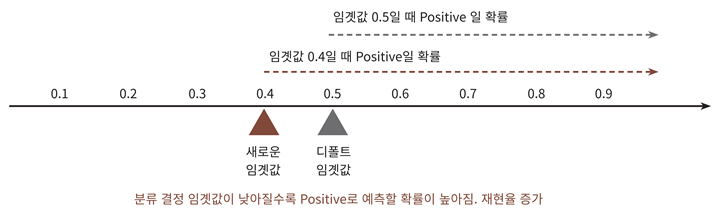

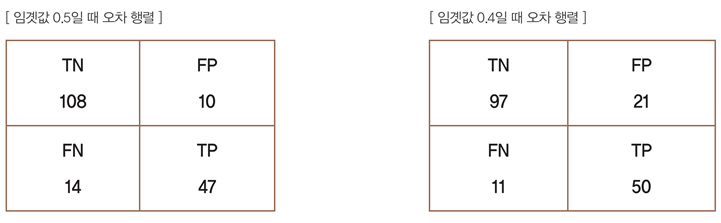

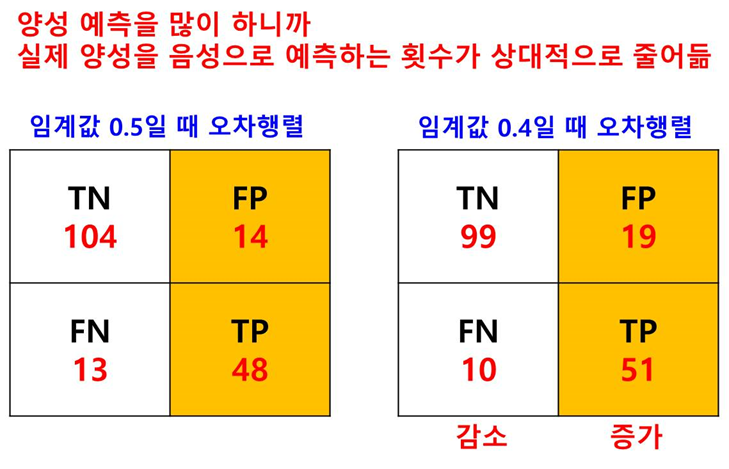

In [11]:
from sklearn.preprocessing import Binarizer
# threshold는 기준값(0/1로 변환시 )
c_threshold = 0.5

pred_proba1 = pred_proba[:,1].reshape(-1,1) # 1일 확률값을 저장하고 있는 변수

In [12]:
bina = Binarizer(threshold=c_threshold).fit(pred_proba1)
custom_preditc = bina.transform(pred_proba1)

print('분류 임계값 : c_threshold= 0.5')
get_clf_eval(y_test, custom_preditc)

# 분류 임계값이 0.5기 때문에 predict()한것과 같은 결과가 나옴
# predict()는 결정임계값 0.5를 사용함

분류 임계값 : c_threshold= 0.5
오차행렬
[[92 18]
 [16 53]]
정확도/정밀도/재현율 0.8100558659217877 / 0.7464788732394366 / 0.7681159420289855


In [13]:
c_threshold=0.4
bina = Binarizer(threshold=c_threshold).fit(pred_proba1)
custom_preditc = bina.transform(pred_proba1)

print('분류 임계값 : c_threshold= 0.4')
get_clf_eval(y_test, custom_preditc)

분류 임계값 : c_threshold= 0.4
오차행렬
[[86 24]
 [13 56]]
정확도/정밀도/재현율 0.7932960893854749 / 0.7 / 0.8115942028985508


- 임계값을 낮추니까 정밀도는 떨어지고 재현율값은 올라감
    - 이유 : 
        - 분류결정 임계값을 낮추면 1로 예측하는 경우가 많아짐
        - 1로 예측하게되면 잘못된 1의 예측도 많아지고 정답인 1의 예측도 많아짐

In [14]:
c_threshold=0.6
bina = Binarizer(threshold=c_threshold).fit(pred_proba1)
custom_preditc = bina.transform(pred_proba1)

print('분류 임계값 : c_threshold= 0.6')
get_clf_eval(y_test, custom_preditc)

분류 임계값 : c_threshold= 0.6
오차행렬
[[99 11]
 [25 44]]
정확도/정밀도/재현율 0.7988826815642458 / 0.8 / 0.6376811594202898


### 여러개의 분류 결정 임곗값을 변경하면서 예측값 변환 확인

In [18]:
thresholds = [0.4,0.45,0.5,0.55,0.6]

def get_eval_by_threshold(ytest, pred_proba_c1,thresholds) :
    for custom_threshold in thresholds :
        bina = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_preditc = bina.transform(pred_proba_c1)
        print('분류 임계값 :', custom_threshold)
        get_clf_eval(y_test, custom_preditc)
        
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)


분류 임계값 : 0.4
오차행렬
[[86 24]
 [13 56]]
정확도/정밀도/재현율 0.7932960893854749 / 0.7 / 0.8115942028985508
분류 임계값 : 0.45
오차행렬
[[91 19]
 [14 55]]
정확도/정밀도/재현율 0.8156424581005587 / 0.7432432432432432 / 0.7971014492753623
분류 임계값 : 0.5
오차행렬
[[92 18]
 [16 53]]
정확도/정밀도/재현율 0.8100558659217877 / 0.7464788732394366 / 0.7681159420289855
분류 임계값 : 0.55
오차행렬
[[97 13]
 [18 51]]
정확도/정밀도/재현율 0.8268156424581006 / 0.796875 / 0.7391304347826086
분류 임계값 : 0.6
오차행렬
[[99 11]
 [25 44]]
정확도/정밀도/재현율 0.7988826815642458 / 0.8 / 0.6376811594202898


### 임곗값에 따른 정밀도-재현율 값 추출
- precision_recall_curve( ) 를 이용

**precision_recall_curve( 실제값, 레이블 값이 1일 때의 예측 확률값)**
- 정밀도, 재현율, 임계값을 ndarray로 반환
- 임계값 : 일반적으로 0.11~0.95 범위
- 정밀도와 재현율의 임계값에 따른 값 변화를 곡선 형태의 그래프로 시각화하는데 이용

In [20]:
from sklearn.metrics import precision_recall_curve

# 1일때의 확률값을 추출
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]

#정밀도, 재현율, 임계값 세개의 값을 반환함
pre, re, th = precision_recall_curve(y_test,pred_proba_c1)

In [25]:
pre.shape[0]
re.shape[0]
th.shape[0]

166

In [26]:
th

array([0.05935084, 0.06364067, 0.06653787, 0.06772694, 0.06957105,
       0.07110537, 0.0719268 , 0.07726071, 0.08396822, 0.08576751,
       0.08708352, 0.08771658, 0.09056071, 0.09104394, 0.09493412,
       0.09589374, 0.09860558, 0.10053144, 0.10487835, 0.10749887,
       0.10768552, 0.10772625, 0.10777322, 0.10779416, 0.10787741,
       0.10867363, 0.10974497, 0.11068696, 0.11119663, 0.11455507,
       0.11524754, 0.11980875, 0.11981061, 0.11991617, 0.12870651,
       0.13058503, 0.13130251, 0.13214701, 0.13375379, 0.13881749,
       0.13904915, 0.14318097, 0.14403809, 0.14733951, 0.14734025,
       0.1481357 , 0.14862788, 0.14947709, 0.15515061, 0.15716402,
       0.16003035, 0.16073569, 0.16076508, 0.1681345 , 0.16921519,
       0.17133458, 0.17285605, 0.17462744, 0.17790117, 0.17891842,
       0.19128952, 0.19404596, 0.20216819, 0.2048648 , 0.20787702,
       0.22370583, 0.22853856, 0.22949249, 0.23639033, 0.23681711,
       0.24442895, 0.24508179, 0.24741156, 0.26068959, 0.26977

In [31]:
# 임의 특정 index에 대해 정밀도, 재현율, 임곗값 확인
import numpy as np
idx = np.arange(0, th.shape[0],15)
print('sample idnex : ', idx)
print('임곗값 sample : ', np.round(th[idx],3))
print('정밀도 sample : ', np.round(pre[idx],3))
print('재현율 sample : ', np.round(re[idx],3))

sample idnex :  [  0  15  30  45  60  75  90 105 120 135 150 165]
임곗값 sample :  [0.059 0.096 0.115 0.148 0.191 0.281 0.431 0.571 0.65  0.799 0.913 0.969]
정밀도 sample :  [0.399 0.418 0.464 0.52  0.594 0.659 0.724 0.803 0.826 1.    1.    1.   ]
재현율 sample :  [1.    0.957 0.928 0.928 0.913 0.87  0.797 0.71  0.551 0.449 0.232 0.014]


In [32]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [35]:
def precision_recall_curve_plot(y_test, pred_proba_c1) :
    pre, re, th = precision_recall_curve(y_test,pred_proba_c1)
    
    # x축은 th y축은 pre, re 값으로 plot 수행
    plt.figure(figsize=(8,6))
    # 값의 갯수를 임곗값에 맞춤
    th_bound = th.shape[0]
    
    #그래프그리기
    plt.plot(th, pre[0:th_bound],linestyle="--",label='precision')
    plt.plot(th, re[0:th_bound],label='recall')
    
    # th 값의 x축의 scale을 0.1단위로 변경
    # x축의 시작값과 끝값
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.xlabel('임곗값')
    plt.ylabel('정밀도/재현율 값')
    plt.legend()
    plt.grid()
    plt.show()   
    

C:\Users\a\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\a\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44247 (\N{HANGUL SYLLABLE GYES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\a\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\a\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\a\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48128 (\N{HANGUL SYLLABLE MIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\a\anaconda3\lib\site-packages\IPy

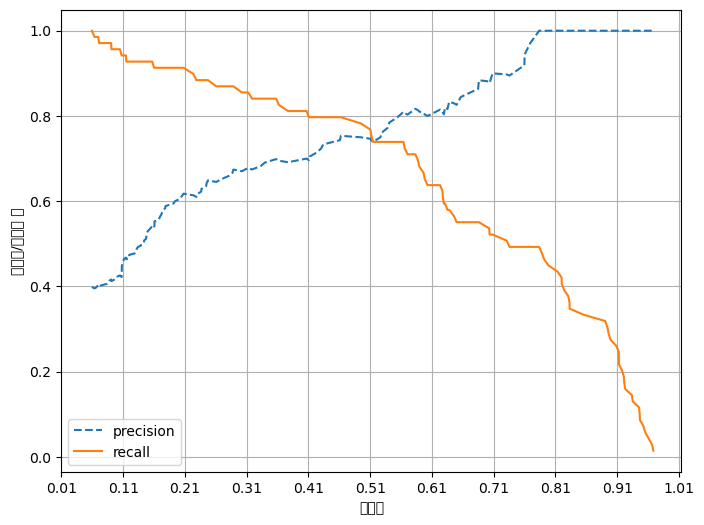

In [36]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

# F1 Score

### F1 Score
- 정밀도와 재현율의 조화평균(tip. 조화평균은 평균변화율등을 구할때 사용(평균속력등))
- 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼때 상대적으로 높은 값을 가짐

### F1 Score 공식
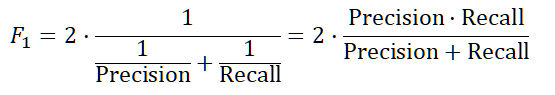

### 예 : 두 예측 모델 비교  
A 예측 모델
- 정밀도 : 0.9
- 재현율 : 0.1 (극단적 차이)
- F1 스코어 : 0.18

B 예측 모델
- 정밀도 : 0.5
- 재현율 : 0.5 (큰 차이 없음)
- F1 스코어 : 0.5 

B모델의 FI 스코어가 A모델에 비해 매우 우수

In [37]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test,pred) # 임곗값이 0.5일때
print('f1 score : ',f1)

f1 score :  0.7571428571428571


## 타이타닉 생존자 예측에서 F1 스코어 확인
- 임곗값 변화에 따른 F1 score를 포함한 평가지표 확인

In [44]:
from sklearn.metrics import f1_score, accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test,pred) :
    confusion = confusion_matrix(y_test,pred) #오차행렬
    accuracy = accuracy_score(y_test,pred) #정확도
    precision = precision_score(y_test,pred) #정밀도
    recall = recall_score(y_test,pred) #재현율
    f1 = f1_score(y_test, pred)
    
    print("오차행렬")
    print(confusion)
    print("정확도/정밀도/재현율", accuracy,'/',precision,'/',recall)
    print("f1_score : ", f1)

In [45]:
th = [0.4,0.45,0.5,0.55,0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1),th)

분류 임계값 : 0.4
오차행렬
[[86 24]
 [13 56]]
정확도/정밀도/재현율 0.7932960893854749 / 0.7 / 0.8115942028985508
f1_score :  0.7516778523489933
분류 임계값 : 0.45
오차행렬
[[91 19]
 [14 55]]
정확도/정밀도/재현율 0.8156424581005587 / 0.7432432432432432 / 0.7971014492753623
f1_score :  0.7692307692307693
분류 임계값 : 0.5
오차행렬
[[92 18]
 [16 53]]
정확도/정밀도/재현율 0.8100558659217877 / 0.7464788732394366 / 0.7681159420289855
f1_score :  0.7571428571428571
분류 임계값 : 0.55
오차행렬
[[97 13]
 [18 51]]
정확도/정밀도/재현율 0.8268156424581006 / 0.796875 / 0.7391304347826086
f1_score :  0.7669172932330827
분류 임계값 : 0.6
오차행렬
[[99 11]
 [25 44]]
정확도/정밀도/재현율 0.7988826815642458 / 0.8 / 0.6376811594202898
f1_score :  0.7096774193548386


# ROC Curve와 AUC

### ROC(Reciver Operating Characteristic)

- 수신자 판단 곡선
- 2차대전 때 통신장비 성능평가를 위해 고안된 척도
- 의학분야에서 많이 사용
- ML의 이진분류 모델의 예측 성능의 중요 평가지표


- FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)가 어떻게 변하는지를 나타내는 곡선
    - FPR이 X축, TPR이 Y축
    - 1-특이성(Specificity)
    - 질병이 없는 건강한 사람이 질병이 있는 것으로 예측되는 수준
    - 특이성 : 실제값 Negative(음성)가 정확히 예측되어야 하는 수준
        - 질병이 없는 건강한 사람은 질병이 없는 것(음성)으로 판정 
    

- TPR : 재현율과 같으며, 민감도(Sensitivity)라 부름
    - 실제값 Positive(양성)가 정확히 예측되어야 하는 수준
        - 질병이 있는 사람이 질병이 있는 것(양성)으로 판정 
        

        
- TNR(True Negative Rate) : 특이성(Specificity)
    - 실제 음성인데 음성으로 예측한 비율  
    - 질병이 없는 사람은 질병이 없는 것으로 음성 판정
    - 값이 클수록 좋음 (음성을 잘 예측)

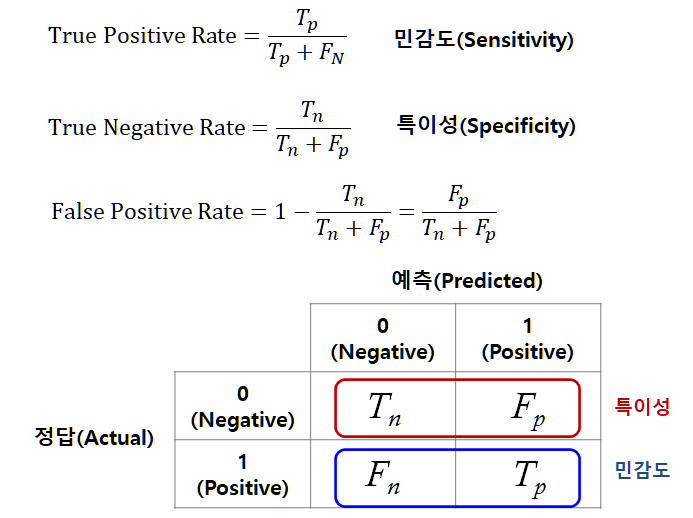

- FPR은 0부터 1까지 변경하면서 TPR의 변화 값을 구함
    - 분류 결정 임계값(Positive 예측값을 결정하는 기준)을 변경하면서 결정
    
    
- FPR을 0으로 만들려면 분류 결정 임계값을 1로 지정
    - Positive 예측 기준이 높아 데이터를 Positive로 예측할 수 없음
    - FPR이 0인 경우 Positive를 예측할 수 없어 FPR이 0이 됨
    
    
- FPR을 1로 만들려면 분류 결정 임계값을 0으로 지정하여 TN을 0으로 만들면 됨
    - 분류기의 Positive 확률기준이 너무 낮아 다 Positive로 예측
    - Negative를 예측할 수 없으므로 TN이 0이 되고 FPR은 1이 됨

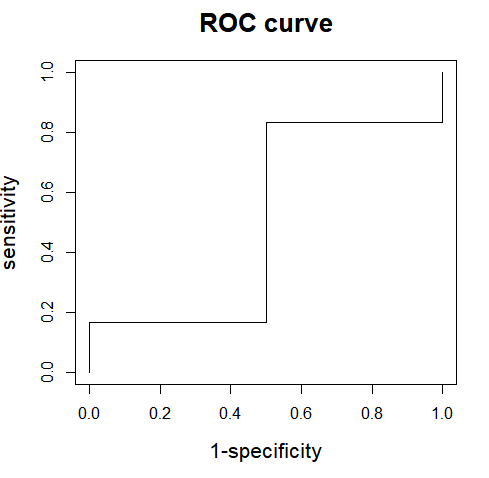

https://hsm-edu.tistory.com/1033

### AUC(Area Under the Curve)
- ROC 곡선 아래 면적
- 대각선의 직선에 대응되면 AUC는 0.5
- 1에 가까울수록 좋은 수치
- FPR이 작을 때 얼마나 큰 TPR을 얻는지에 따라 결정

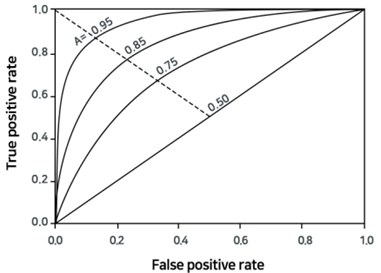

In [46]:
from sklearn.metrics import roc_curve

# 1일때의 예측확률(타이타닉 생존자 확률)
pre_proba_c1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, th = roc_curve(y_test, pred_proba_c1)

In [54]:
fprs.shape
tprs.shape
th.shape

(52,)

In [58]:
# 반환된 임곗값 배열에서 샘프로 데이터를 추출
# 0번 index의 임곗값은 배제
th_index = np.arange(1,th.shape[0], 5)
print('샘플 인덱스 : ', th_index)
print('샘플 임곗값 : ', th[th_index])
print('샘플 FPR : ', fprs[th_index])
print('샘플 TPR : ', tprs[th_index])

샘플 인덱스 :  [ 1  6 11 16 21 26 31 36 41 46 51]
샘플 임곗값 :  [0.96863364 0.6861429  0.62942223 0.56394079 0.37690357 0.28849216
 0.16076508 0.14947709 0.10787741 0.09056071 0.02913944]
샘플 FPR :  [0.         0.04545455 0.09090909 0.10909091 0.22727273 0.26363636
 0.46363636 0.51818182 0.72727273 0.85454545 1.        ]
샘플 TPR :  [0.01449275 0.55072464 0.5942029  0.73913043 0.8115942  0.86956522
 0.91304348 0.92753623 0.94202899 0.97101449 1.        ]


- FPR은 점차적으로 증가하는 반면 TPR은 급격히 증가함

In [56]:
th[:10]
# roc_curve()는 임곗값의 0 인덱스에는 최대임곗값 + 1한 임의의 값을 저장함

array([1.96863364, 0.96863364, 0.78372713, 0.73570292, 0.70839388,
       0.70348495, 0.6861429 , 0.65007255, 0.6380441 , 0.63522641])

## FPR의 변화에 따른 TPR의 변화를 ROC 곡선으로 시각화

In [61]:
def roc_curve_plot(y_test, pred_proba_c1) :
    fprs, tprs, th = roc_curve(y_test, pred_proba_c1)
    
    # roc 곡선 그릭
    plt.plot(fprs,tprs, label='ROC')
    
    # 가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1],'k--', label='Random')
    
    # 축 스케일 변환
    start,end= plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR'); plt.ylabel('TPR')
    plt.legend()
    plt.show()
                 
    

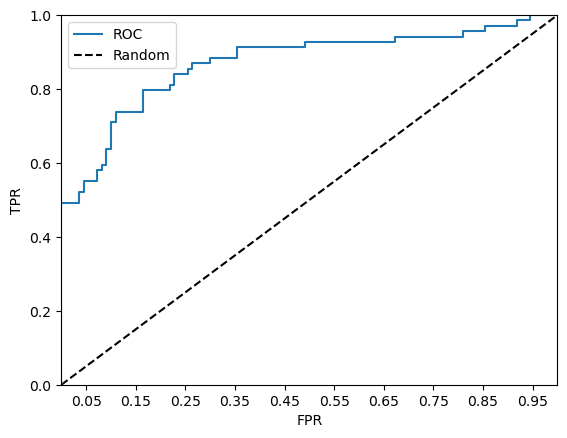

In [62]:
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

- 대부분의 분류 모델 알고리즘은 auc값이 0.5이상으로 나옴
    - 모델링한 평가지표의 auc값이 0.5 근처면 성능이 아주 안좋은 모델임

In [63]:
# 타이타닉 생존자 예측 로지스틱회귀모델의 auc 값
# 기본 전처리와 기본 하이퍼파라미터 사용 모델링을 진행했음
from sklearn.metrics import roc_auc_score
# 1일때의 확률을 전달해야 함
pred_prob_c1 = lr_clf.predict_proba(X_test)[:,1]
auc_score = roc_auc_score(y_test, pred_proba_c1)
print('auc 값 : ', auc_score)

auc 값 :  0.8706192358366271
